Import required libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd
import tensorflow as tf

# tf.logging.set_verbosity(tf.logging.ERROR)

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

I will sample lyrics from the band Rush and generate more lyrics using forward and back propagation in Recurrent Neural Network.

## Exploratory Data Analysis

Read the downloaded input dataset:

In [4]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     --------- --------------------------- 61.4/250.0 kB 825.8 kB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.6 MB/s eta 0:00:00


In [5]:
df = pd.read_excel('RushLyrics.xlsx')

Returns first 5 rows with head()

In [3]:
df.head()

Year  Number Album               Song  \
0  1974       1  Rush     Finding my Way   
1  1974       1  Rush    Need Some Love    
2  1974       1  Rush      Take a Friend   
3  1974       1  Rush         Here Again   
4  1974       1  Rush  What You're Doing   

                                               Lyric  
0  Yeah, oh yeah Ooh, said I I'm coming out to ge...  
1  I’m runnin’ here, I’m runnin’ there. I’m looki...  
2  Well, I'm looking at you And I'm wondering wha...  
3  I said I played this song so many times before...  
4  Well, I see you standin' there With your finge...

Rush has created 157 songs throughout their career.

In [4]:
df.shape

(157, 5)

They have released 19 total studio albums

In [5]:
len(df['Album'].unique())

19

How many songs are in each album

In [6]:
df['Album'].value_counts()[:]

Album
Vapor Trails            13
Clockwork Angels        12
Presto                  11
Snakes and Arrows       10
Test for Echo           10
Counterparts            10
Hold your Fire          10
Roll the Bones           9
Power Windows            8
Rush                     8
Fly by Night             8
Signals                  8
Grace Under Pressure     8
Moving Pictures          6
Permanent Waves          6
A Farewell to Kings      6
2112                     6
Caress of Steel          5
Hemispheres              3
Name: count, dtype: int64

Plot the count of songs per album

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Rush'),
  Text(1, 0, 'Fly by Night'),
  Text(2, 0, 'Caress of Steel'),
  Text(3, 0, '2112'),
  Text(4, 0, 'A Farewell to Kings'),
  Text(5, 0, 'Hemispheres'),
  Text(6, 0, 'Permanent Waves'),
  Text(7, 0, 'Moving Pictures'),
  Text(8, 0, 'Signals'),
  Text(9, 0, 'Grace Under Pressure'),
  Text(10, 0, 'Power Windows'),
  Text(11, 0, 'Hold your Fire'),
  Text(12, 0, 'Presto'),
  Text(13, 0, 'Roll the Bones'),
  Text(14, 0, 'Counterparts'),
  Text(15, 0, 'Test for Echo'),
  Text(16, 0, 'Vapor Trails'),
  Text(17, 0, 'Snakes and Arrows'),
  Text(18, 0, 'Clockwork Angels')])

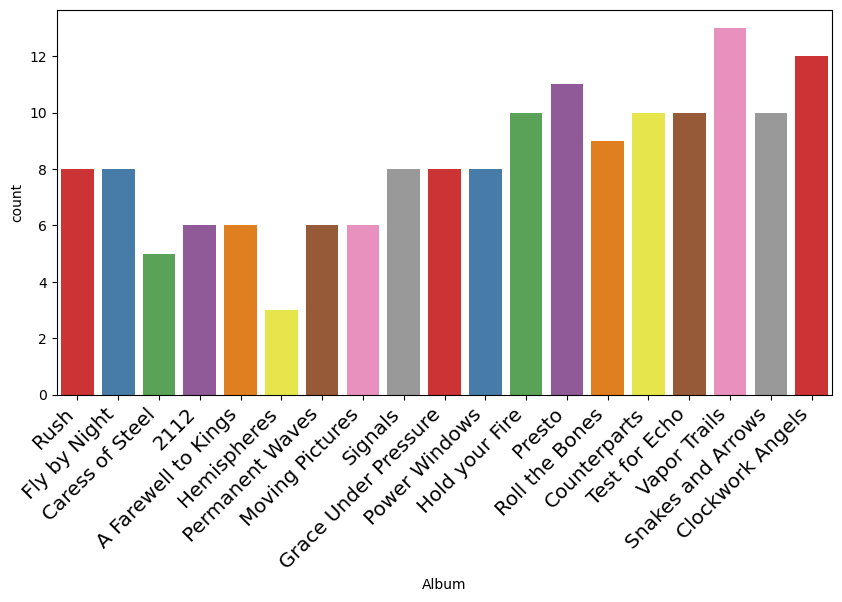

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='Album',
    palette='Set1'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Average number of songs in each album

In [8]:
df['Album'].value_counts().values.mean()

8.263157894736842

We have song lyrics in the column text, so we combine all the rows of that column and save it as a text in a variable called data, as follows:

In [6]:
data = ', '.join(df['Lyric'])

Let's see a few lines of a song:

In [7]:
data[:369]

"Yeah, oh yeah Ooh, said I I'm coming out to get you Ooh, sit down I'm coming out to find you Ooh, yeah, ooh yeah Finding my way I've been gone so long I've lost count of the years Well, I sang some sad songs Oh yes, and cried some bad tears Look out, I'm coming Whoa, whoa Look out, I'm coming Whoa, yeah I'm running Finding my way back home Oh yeah Yeah, oh yeah Ooh, "

### Display the datatype of the variable "data" 

In [8]:
print (type(data))

<class 'str'>


#### print the length of the text

In [12]:
print (len(data))

163469


#### Tokenize the text by sentences <br> sent_tokenize()

In [13]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jchen501\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#Tokenize the text by sentences :
sentences = sent_tokenize(data)

#### How many sentences are there?

In [15]:
print (len(sentences))

253


#### Print the sentences 

In [16]:
print(sentences)

["Yeah, oh yeah Ooh, said I I'm coming out to get you Ooh, sit down I'm coming out to find you Ooh, yeah, ooh yeah Finding my way I've been gone so long I've lost count of the years Well, I sang some sad songs Oh yes, and cried some bad tears Look out, I'm coming Whoa, whoa Look out, I'm coming Whoa, yeah I'm running Finding my way back home Oh yeah Yeah, oh yeah Ooh, said I I'm coming back to look for you Ooh, sit down I'm going by the back door Ooh, yeah, ooh yeah Finding my way You've done me no right But you've done me some wrong Left me lonely each night While I sing my sad song Look out, I'm coming Whoa, whoa Look out, I'm coming Whoa, yeah I'm running Finding my way back home I'm coming Ooh babe, I said I'm running Whoa babe, I said I'm coming To get you mama Said I'm running Ooh babe, I said I'm coming For you babe I said I'm running Ooh yes, babe, I said I'm coming To get you, babe, I said I'm coming Ooh, yeah I'm finding I'm finding my way back home Well, I've had it for now 

#### Tokenize the text with words. Assigning them to a variable called: words

In [17]:
words = word_tokenize(data)

#### How many words are there? 

In [18]:
print (len(words))

33399


#### Print the words

In [19]:
print (words)

['Yeah', ',', 'oh', 'yeah', 'Ooh', ',', 'said', 'I', 'I', "'m", 'coming', 'out', 'to', 'get', 'you', 'Ooh', ',', 'sit', 'down', 'I', "'m", 'coming', 'out', 'to', 'find', 'you', 'Ooh', ',', 'yeah', ',', 'ooh', 'yeah', 'Finding', 'my', 'way', 'I', "'ve", 'been', 'gone', 'so', 'long', 'I', "'ve", 'lost', 'count', 'of', 'the', 'years', 'Well', ',', 'I', 'sang', 'some', 'sad', 'songs', 'Oh', 'yes', ',', 'and', 'cried', 'some', 'bad', 'tears', 'Look', 'out', ',', 'I', "'m", 'coming', 'Whoa', ',', 'whoa', 'Look', 'out', ',', 'I', "'m", 'coming', 'Whoa', ',', 'yeah', 'I', "'m", 'running', 'Finding', 'my', 'way', 'back', 'home', 'Oh', 'yeah', 'Yeah', ',', 'oh', 'yeah', 'Ooh', ',', 'said', 'I', 'I', "'m", 'coming', 'back', 'to', 'look', 'for', 'you', 'Ooh', ',', 'sit', 'down', 'I', "'m", 'going', 'by', 'the', 'back', 'door', 'Ooh', ',', 'yeah', ',', 'ooh', 'yeah', 'Finding', 'my', 'way', 'You', "'ve", 'done', 'me', 'no', 'right', 'But', 'you', "'ve", 'done', 'me', 'some', 'wrong', 'Left', 'me', 

#### using a variable "fdist" Find the frequency distribution <br> FreqDist()

In [20]:
from nltk.probability import FreqDist

In [21]:
fdist = FreqDist(words)

### Print the 20 most common words

In [22]:
fdist.most_common(20)

[('the', 1807),
 ('I', 860),
 (',', 790),
 ('of', 763),
 ('a', 735),
 ('to', 708),
 ('and', 472),
 ('in', 388),
 ('you', 379),
 ("'s", 373),
 ('The', 327),
 ('that', 277),
 ('is', 277),
 ('me', 242),
 ('it', 241),
 ('on', 229),
 ("n't", 229),
 ('...', 227),
 ('we', 221),
 ('And', 218)]

#### Plot the graph for fdist

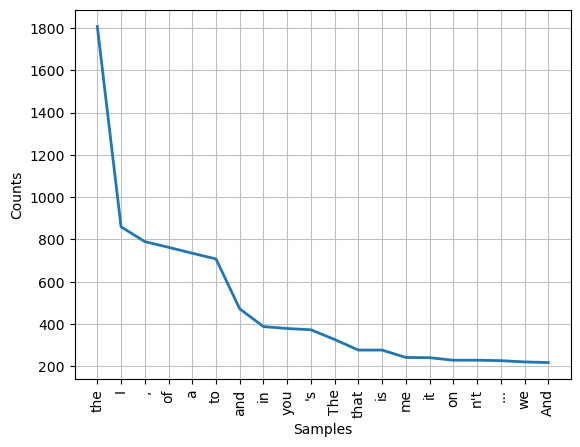

<Axes: xlabel='Samples', ylabel='Counts'>

In [23]:
#Plot the graph for fdist :
import matplotlib.pyplot as plt
%matplotlib inline
fdist.plot(20)

We need to remove the stopwords and punctuation marks. We will remove the punctuation marks first.

#### Create an empty list to store words and call it: words_no_punc

In [24]:
words_no_punc = []

#### Using a for loop, remove punctuation marks and make them lowercase w.lower()
Hint: 
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

In [25]:
#Removing punctuation marks :
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

#### Print the words without punctution marks

In [26]:
print (words_no_punc)

['yeah', 'oh', 'yeah', 'ooh', 'said', 'i', 'i', 'coming', 'out', 'to', 'get', 'you', 'ooh', 'sit', 'down', 'i', 'coming', 'out', 'to', 'find', 'you', 'ooh', 'yeah', 'ooh', 'yeah', 'finding', 'my', 'way', 'i', 'been', 'gone', 'so', 'long', 'i', 'lost', 'count', 'of', 'the', 'years', 'well', 'i', 'sang', 'some', 'sad', 'songs', 'oh', 'yes', 'and', 'cried', 'some', 'bad', 'tears', 'look', 'out', 'i', 'coming', 'whoa', 'whoa', 'look', 'out', 'i', 'coming', 'whoa', 'yeah', 'i', 'running', 'finding', 'my', 'way', 'back', 'home', 'oh', 'yeah', 'yeah', 'oh', 'yeah', 'ooh', 'said', 'i', 'i', 'coming', 'back', 'to', 'look', 'for', 'you', 'ooh', 'sit', 'down', 'i', 'going', 'by', 'the', 'back', 'door', 'ooh', 'yeah', 'ooh', 'yeah', 'finding', 'my', 'way', 'you', 'done', 'me', 'no', 'right', 'but', 'you', 'done', 'me', 'some', 'wrong', 'left', 'me', 'lonely', 'each', 'night', 'while', 'i', 'sing', 'my', 'sad', 'song', 'look', 'out', 'i', 'coming', 'whoa', 'whoa', 'look', 'out', 'i', 'coming', 'who

#### print the Length of words_no_punc

In [27]:
print (len(words_no_punc))

30828


#### find the Frequency distribution of words_no_punc. Use the variabel fdist

In [28]:
fdist = FreqDist(words_no_punc)

#### Display the 20 most common words

In [29]:
fdist.most_common(20)

[('the', 2134),
 ('a', 914),
 ('i', 860),
 ('to', 836),
 ('of', 781),
 ('and', 690),
 ('in', 519),
 ('you', 511),
 ('it', 405),
 ('we', 343),
 ('that', 313),
 ('is', 303),
 ('on', 269),
 ('me', 242),
 ('my', 237),
 ('all', 222),
 ('can', 207),
 ('for', 204),
 ('do', 183),
 ('with', 167)]

#### Plot the 20 most common words on a grpah:

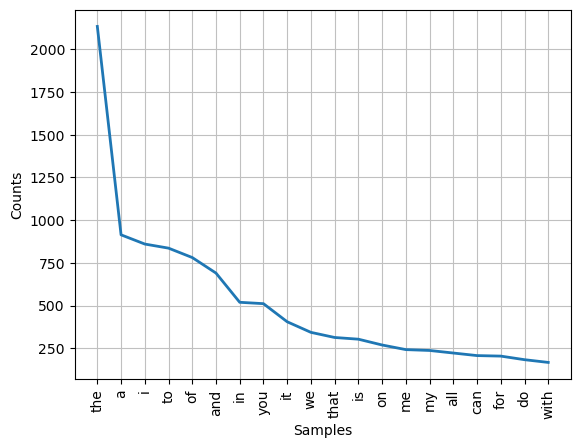

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
fdist.plot(20)

## Removing Stopwords

#### Print the List of stopwords from NLTK in English <br> assign them to a variable called: stopwords
hint:  
stopwords = stopwords.words("english")
then print them.

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jchen501\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
#List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Create an empty list to store clean words and call it: clean_words

In [33]:
clean_words = []

#### Using a for loop, remove stopwords 
hint: 
for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)

In [34]:
for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)

#### print the clean_words

In [35]:
print(clean_words)

['yeah', 'oh', 'yeah', 'ooh', 'said', 'coming', 'get', 'ooh', 'sit', 'coming', 'find', 'ooh', 'yeah', 'ooh', 'yeah', 'finding', 'way', 'gone', 'long', 'lost', 'count', 'years', 'well', 'sang', 'sad', 'songs', 'oh', 'yes', 'cried', 'bad', 'tears', 'look', 'coming', 'whoa', 'whoa', 'look', 'coming', 'whoa', 'yeah', 'running', 'finding', 'way', 'back', 'home', 'oh', 'yeah', 'yeah', 'oh', 'yeah', 'ooh', 'said', 'coming', 'back', 'look', 'ooh', 'sit', 'going', 'back', 'door', 'ooh', 'yeah', 'ooh', 'yeah', 'finding', 'way', 'done', 'right', 'done', 'wrong', 'left', 'lonely', 'night', 'sing', 'sad', 'song', 'look', 'coming', 'whoa', 'whoa', 'look', 'coming', 'whoa', 'yeah', 'running', 'finding', 'way', 'back', 'home', 'coming', 'ooh', 'babe', 'said', 'running', 'whoa', 'babe', 'said', 'coming', 'get', 'mama', 'said', 'running', 'ooh', 'babe', 'said', 'coming', 'babe', 'said', 'running', 'ooh', 'yes', 'babe', 'said', 'coming', 'get', 'babe', 'said', 'coming', 'ooh', 'yeah', 'finding', 'finding

#### display the lenght of the clean_words

In [36]:
print(len(clean_words))

15907


Nearly half the word length are gone after removing stopwords and punctuation.

#### find the Frequency distribution and call it: fdist

In [37]:
#Frequency distribution :
fdist = FreqDist(clean_words)

#### find the 30 most common words

In [38]:
fdist.most_common(30)

[('like', 154),
 ('world', 140),
 ('time', 105),
 ('get', 90),
 ('know', 90),
 ('love', 83),
 ('life', 83),
 ('see', 82),
 ('one', 81),
 ('way', 76),
 ('away', 73),
 ('light', 71),
 ('feel', 70),
 ('sometimes', 68),
 ('ca', 67),
 ('us', 66),
 ('yeah', 65),
 ('well', 64),
 ('still', 64),
 ('night', 63),
 ('big', 62),
 ('got', 60),
 ('around', 59),
 ('eyes', 58),
 ('could', 58),
 ('heart', 58),
 ('day', 56),
 ('make', 53),
 ('turn', 52),
 ('things', 51)]

#### Plot the 30 most common words on grpah:

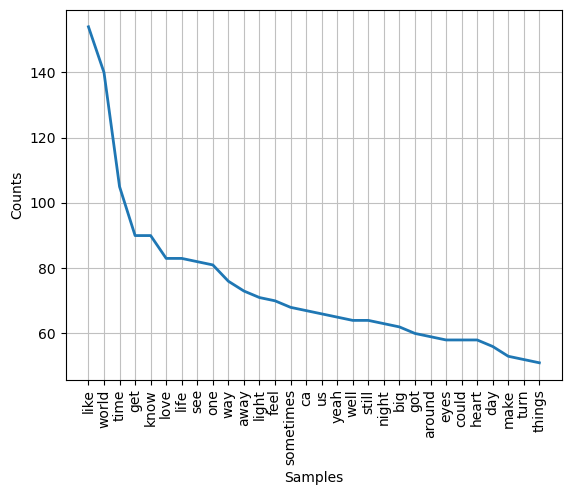

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
#Plot the most common words on grpah:
fdist.plot(30)

## Named Entity Recognition

In [40]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')
# Import the displaCy library
from spacy import displacy
doc = nlp(data)
displacy.render(doc, style='ent', jupyter=True)

Rush lyrics range from fantasy, history, love, to philosophy. NER is able to categorize several fictional terms such as Watchmaker as ORG, Kubla Khan as PERSON, or Bastille as Geo Political Entity. The displaCy library incorrectly labels some words as named entities such as  Ooh for person, Keep for person, or Kicked for organization 

## Word Cloud

#### Generate the wordcloud and call it: wordcloud
hint: wordcloud = WordCloud().generate(text)

In [41]:
from wordcloud import WordCloud
from PIL import Image

In [42]:
#Generating the wordcloud :
wordcloud = WordCloud().generate(data)

#### Plot the wordcloud :

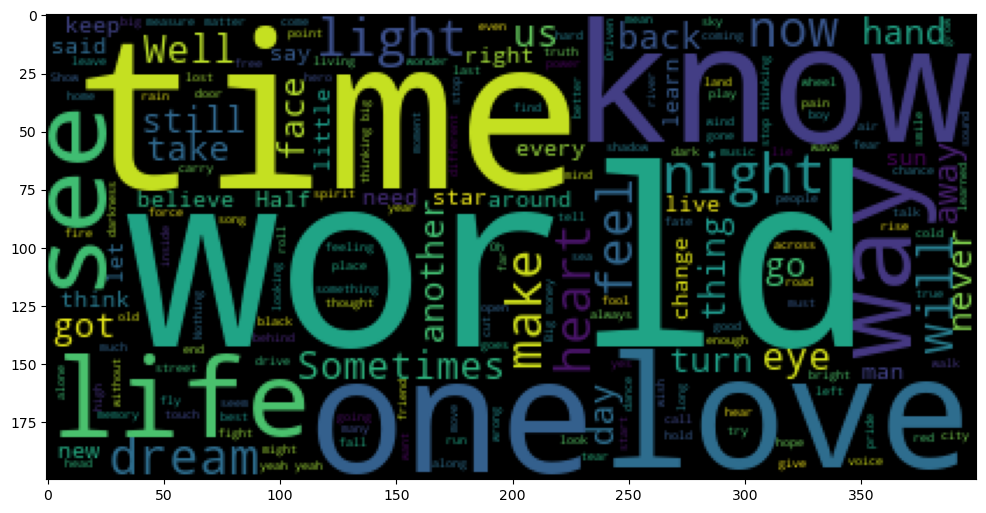

In [43]:
#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

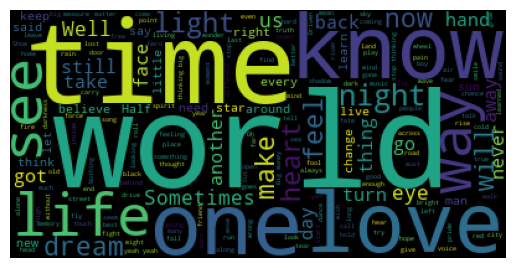

In [44]:
#To remove the axis value :
plt.axis("off") 
plt.imshow(wordcloud) 
plt.show()

#### Assign the top 30 words to a variable called: most_common_words

In [45]:
most_common_words = fdist.most_common(30)

#### print the most common words

In [46]:
print (most_common_words[:])

[('like', 154), ('world', 140), ('time', 105), ('get', 90), ('know', 90), ('love', 83), ('life', 83), ('see', 82), ('one', 81), ('way', 76), ('away', 73), ('light', 71), ('feel', 70), ('sometimes', 68), ('ca', 67), ('us', 66), ('yeah', 65), ('well', 64), ('still', 64), ('night', 63), ('big', 62), ('got', 60), ('around', 59), ('eyes', 58), ('could', 58), ('heart', 58), ('day', 56), ('make', 53), ('turn', 52), ('things', 51)]


the most common words list's elements are in the form of tuple
get only the first element of each tuple of the word list

In [47]:
word_features = [item[0] for item in most_common_words]
print (word_features[:20])

['like', 'world', 'time', 'get', 'know', 'love', 'life', 'see', 'one', 'way', 'away', 'light', 'feel', 'sometimes', 'ca', 'us', 'yeah', 'well', 'still', 'night']


In [48]:
word_features = [item[0] for item in most_common_words]
print (word_features[:15])

['like', 'world', 'time', 'get', 'know', 'love', 'life', 'see', 'one', 'way', 'away', 'light', 'feel', 'sometimes', 'ca']


## Get the POS tag of those words using nltp.pos_tag()

In [50]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(word_features[:])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jchen501\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('like', 'IN'),
 ('world', 'NN'),
 ('time', 'NN'),
 ('get', 'VB'),
 ('know', 'VBN'),
 ('love', 'JJ'),
 ('life', 'NN'),
 ('see', 'VBP'),
 ('one', 'CD'),
 ('way', 'NN'),
 ('away', 'RB'),
 ('light', 'JJ'),
 ('feel', 'NN'),
 ('sometimes', 'RB'),
 ('ca', 'MD'),
 ('us', 'PRP'),
 ('yeah', 'VB'),
 ('well', 'RB'),
 ('still', 'RB'),
 ('night', 'NN'),
 ('big', 'JJ'),
 ('got', 'VBD'),
 ('around', 'IN'),
 ('eyes', 'NNS'),
 ('could', 'MD'),
 ('heart', 'NN'),
 ('day', 'NN'),
 ('make', 'VBP'),
 ('turn', 'NN'),
 ('things', 'NNS')]

## Generating Lyrics with Recurrent Neural Network

Since we are building a char-level RNN, we will store all the unique characters in our dataset into a variable called chars; this is basically our vocabulary:

In [ ]:
chars = sorted(list(set(data)))

Store the vocabulary size in a variable called vocab_size:

In [ ]:
vocab_size = len(chars)

We map all the characters in the vocabulary to their corresponding index that forms a unique number. We define a char_to_ix dictionary, which has a mapping of all the characters to the index. To get the index by a character, we also define the ix_to_char dictionary, which has a mapping of all the indices to their respective characters:

In [ ]:
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}

As you can see in the following code snippet, the character 's' is mapped to an index 66 in the char_to_ix dictionary:

In [ ]:
char_to_ix['s']

Similarly, if we give 66 as an input to the ix_to_char, then we get the corresponding character, which is 's':

In [ ]:
ix_to_char[66]

Once we obtain the character to integer mapping, we use one-hot encoding to represent the input and output in vector form. A one-hot encoded vector is basically a vector full of 0s, except for a 1 at a position corresponding to a character index.

For example, let's suppose that the vocabSize is 7, and the character z is in the fourth position in the vocabulary. Then, the one-hot encoded representation for the character z can be represented as follows:

In [ ]:
vocabSize = 7
char_index = 4

np.eye(vocabSize)[char_index]

As you can see, we have a 1 at the corresponding index of the character, and the rest of the values are 0s. This is how we convert each character into a one-hot encoded vector.

In the following code, we define a function called one_hot_encoder, which will return the one-hot encoded vectors, given an index of the character:

In [ ]:
def one_hot_encoder(index):
    return np.eye(vocab_size)[index]

## Defining the Network Parameters

In [ ]:
#define the number of units in the hidden layer:
hidden_size = 100  
 
#define the length of the input and output sequence:
seq_length = 25  

#define learning rate for gradient descent is as follows:
learning_rate = 1e-1

#set the seed value:
seed_value = 42
#tf.set_random_seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

## Defining Placeholders

Now, we will define the TensorFlow placeholders. The placeholders for the input and output are as follows:

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [ ]:
inputs = tf.placeholder(shape=[None, vocab_size],dtype=tf.float32, name="inputs")
targets = tf.placeholder(shape=[None, vocab_size], dtype=tf.float32, name="targets")

Define the placeholder for the initial hidden state:

In [ ]:
init_state = tf.placeholder(shape=[1, hidden_size], dtype=tf.float32, name="state")

Define an initializer for initializing the weights of the RNN:

In [ ]:
initializer = tf.random_normal_initializer(stddev=0.1)

## Defining forward propagation

Let's define the forward propagation involved in the RNN, which is mathematically given as follows:

$$ h_t =  \operatorname{tanh}(U x_t + W h_{t-1} + bh) $$
$$ \hat{y} =  \operatorname{softmax}(V h_t + by) $$

In [ ]:
with tf.variable_scope("RNN") as scope:
    h_t = init_state
    y_hat = []

    for t, x_t in enumerate(tf.split(inputs, seq_length, axis=0)):
        if t > 0:
            scope.reuse_variables()  

        #input to hidden layer weights
        U = tf.get_variable("U", [vocab_size, hidden_size], initializer=initializer)

        #hidden to hidden layer weights
        W = tf.get_variable("W", [hidden_size, hidden_size], initializer=initializer)

        #output to hidden layer weights
        V = tf.get_variable("V", [hidden_size, vocab_size], initializer=initializer)

        #bias for hidden layer
        bh = tf.get_variable("bh", [hidden_size], initializer=initializer)

        #bias for output layer
        by = tf.get_variable("by", [vocab_size], initializer=initializer)

        h_t = tf.tanh(tf.matmul(x_t, U) + tf.matmul(h_t, W) + bh)

        y_hat_t = tf.matmul(h_t, V) + by

        y_hat.append(y_hat_t)       

#### Apply softmax on the output and get the probabilities:

In [ ]:
output_softmax = tf.nn.softmax(y_hat[-1])  

outputs = tf.concat(y_hat, axis=0)

Compute the cross-entropy loss:

In [ ]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=targets, logits=outputs))

Store the final hidden state of the RNN in hprev. We use this final hidden state for making predictions:

In [ ]:
hprev = h_t

## Defining Backpropagation Through Time

Now, we will perform the BPTT, with Adam as our optimizer. We will also perform gradient clipping to avoid the exploding gradients problem.

Initialize the Adam optimizer:

In [ ]:
minimizer = tf.train.AdamOptimizer()

Compute the gradients of the loss with the Adam optimizer:

In [ ]:
gradients = minimizer.compute_gradients(loss)

Set the threshold for the gradient clipping:

In [ ]:
threshold = tf.constant(5.0, name="grad_clipping")

Clip the gradients which exceeds the threshold and bring it to the range:

In [ ]:
clipped_gradients = []
for grad, var in gradients:
    clipped_grad = tf.clip_by_value(grad, -threshold, threshold)
    clipped_gradients.append((clipped_grad, var))

Update the gradients with the clipped gradients:

In [ ]:
updated_gradients = minimizer.apply_gradients(clipped_gradients)

## Start generating songs 


Start the TensorFlow session and initialize all the variables:

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

## Complete code block for generating songs

In [ ]:
pointer = 0
iteration = 0

In [ ]:
while True:
    
    if pointer + seq_length+1 >= len(data) or iteration == 0:
        hprev_val = np.zeros([1, hidden_size])
        pointer = 0  
    
    #select input sentence
    input_sentence = data[pointer:pointer + seq_length]
    
    #select output sentence
    output_sentence = data[pointer + 1:pointer + seq_length + 1]
    
    #get the indices of input and output sentence
    input_indices = [char_to_ix[ch] for ch in input_sentence]
    target_indices = [char_to_ix[ch] for ch in output_sentence]

    #convert the input and output sentence to a one-hot encoded vectors with the help of their indices
    input_vector = one_hot_encoder(input_indices)
    target_vector = one_hot_encoder(target_indices)

    
    #train the network and get the final hidden state
    hprev_val, loss_val, _ = sess.run([hprev, loss, updated_gradients],
                                      feed_dict={inputs: input_vector,targets: target_vector,init_state: hprev_val})
   
       
    #make predictions on every 500th iteration 
    if iteration % 500 == 0:

        #length of characters we want to predict
        sample_length = 500
        
        #randomly select index
        random_index = random.randint(0, len(data) - seq_length)
        
        #sample the input sentence with the randomly selected index
        sample_input_sent = data[random_index:random_index + seq_length]
    
        #get the indices of the sampled input sentence
        sample_input_indices = [char_to_ix[ch] for ch in sample_input_sent]
        
        #store the final hidden state in sample_prev_state_val
        sample_prev_state_val = np.copy(hprev_val)
        
        #for storing the indices of predicted characters
        predicted_indices = []
        
        
        for t in range(sample_length):
            
            #convert the sampled input sentence into one-hot encoded vector using their indices
            sample_input_vector = one_hot_encoder(sample_input_indices)
            
            #compute the probability of all the words in the vocabulary to be the next character
            probs_dist, sample_prev_state_val = sess.run([output_softmax, hprev],
                                                      feed_dict={inputs: sample_input_vector,init_state: sample_prev_state_val})

            #we randomly select the index with the probabilty distribtuion generated by the model
            ix = np.random.choice(range(vocab_size), p=probs_dist.ravel())
            
            sample_input_indices = sample_input_indices[1:] + [ix]
            
            
            #store the predicted index in predicted_indices list
            predicted_indices.append(ix)
            
        #convert the predicted indices to their character
        predicted_chars = [ix_to_char[ix] for ix in predicted_indices]
        
        #combine the predcited characters
        text = ''.join(predicted_chars)
        
        #predict the predict text on every 50000th iteration
        if iteration %20000 == 0:           
            print ('\n')
            print (' After %d iterations' %(iteration))
            print('\n %s \n' % (text,))   
            print('-'*115)
        
        if iteration == 1000000:
            break
            
    #increment the pointer and iteration
    pointer += seq_length
    iteration += 1

## RNN Conclusion

After a million iterations, the automatically generated lyrics still consists of nonsensical sentences and fake words. The sentences makes some grammatical sense some correct parts of speech and prepositions. I wanted to generate lyrics specifically for the band Rush, but the input of the dataset of 157 song is not enough even after large number of iterations. Will need more sophisticated hyperparameter tuning to generate lyrics for a single band.

## Text Generation Using RNN with LSTM 

from Module 14 notebook

Steps:
1. Import Libraries
2. Load the Dataset
3. Tokenize the Text
4. Create Input Sequences and Labels
5. Build the LSTM Model
6. Train the Model
7. Generate Text Function
8. Generate Text

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#see the dataset
#data

In [10]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

### Create input sequences and corresponding labels
steps:
1. Initialize an Empty List
2. Tokenize the Text
3. Create N-gram Sequences

for loop:
- For each line, a loop iterates through the indices of the token_list. 
- For each index i, it creates an N-gram sequence (n_gram_sequence) by taking the subsequence from the beginning of the token_list up to index i+1. 
- This ensures that the sequence includes the current word and all the preceding words.

N-gram
- The N-gram sequences are then appended to the input_sequences list. 
- The idea is to create training examples where the input is a sequence of words, and the output (label) is the next word in the sequence.

In [11]:
# Create input sequences and corresponding labels
input_sequences = []
for line in data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

#### Data preparation:
Let's prepare the input data by ensuring that all sequences have the same length, separating input sequences (X) from output labels (y), and one-hot encoding the output labels for training a language model.

steps:
1. Calculate Maximum Sequence Length
2. Pad Sequences
3. Create Input (X) and Output (y) Sequences
4. One-Hot Encode the Output (y)

X, y = input_sequences[:,:-1],input_sequences[:,-1]
- The X variable represents the input sequences, which include all elements of each sequence except the last one. 
- The y variable represents the labels, which are the last elements of each sequence.
- X represents the input sequences for training the language model.
- input_sequences[:, :-1] selects all elements in each row of input_sequences except for the last one.
- X consists of the first to second-to-last elements of each sequence in input_sequences.
- Each row of X corresponds to an input sequence that the model will use to predict the next word.

In [12]:
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [13]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
# model.add(LSTM(150, return_sequences = True))
model.add(LSTM(100))
# model.add(Dense(150, activation = 'relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31030, 50)         212950    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 4259)              430159    
                                                                 
Total params: 703,509
Trainable params: 703,509
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


InvalidArgumentError: Graph execution error:

No OpKernel was registered to support Op 'CudnnRNN' used by {{node CudnnRNN}} with these attrs: [seed=0, dropout=0, T=DT_FLOAT, input_mode="linear_input", direction="unidirectional", rnn_mode="lstm", seed2=0, is_training=true]
Registered devices: [CPU, GPU]
Registered kernels:
  <no registered kernels>

	 [[CudnnRNN]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_train_function_3104]

#### Function to generate text
Let's create a function generate_text that uses a trained language model to generate a sequence of words based on a given seed text.

Steps:
1. Function Definition
2. Tokenize the Seed Text
3. Pad Tokenized Sequence
4. Predict the Next Word
5. Map Index to Word
6. Update Seed Text
7. Return Generated Text

Note: generate_text is a function that takes four parameters:
- seed_text: The initial text or seed for generating the sequence.
- next_words: The number of words to generate.
- model: The trained language model.
- max_sequence_length: The maximum length of the input sequence.

In [ ]:
# Function to generate text
def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0] # tokenizing the seed text
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre') # padding
        
        #The model is used to predict the index of the next word in the sequence using the predict method. 
        predicted = np.argmax(model.predict(token_list, verbose=0)) 
        
        # The predicted index is then mapped back to the corresponding word using the word_index attribute of the tokenizer
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        
        # The predicted word is appended to the seed text, creating an updated seed for the next iteration.
        seed_text += " " + output_word
    return seed_text

#### Generate text
- generate_text is a function that takes four parameters: a seed text ("Freeze this moment"), the number of words to generate (20), the trained model (model), and the maximum sequence length (max_sequence_length).
The function generates text by iteratively predicting the next word and appending it to the seed text.

In [ ]:
# Generate text
generated_text = generate_text("Freeze this moment a little bit longer Make each sensation a little bit stronger", 20, model, max_sequence_length)
print(generated_text)

## RNN LSTM Conclusion

I do no have access to computer that can run Tensor Keras cuDNN. This code from module 14 should be able to generate text based on seed text.